## Look at the big picture
1. Aims: Classify any new diamond in the three categories (Low, Mid and High grade).
2. Performance measure: confusion matrix



## Get the data

### Import the packages and the data

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
# Read the CSV file
df = pd.read_csv(
    '/Users/sean/OneDrive - connect.hku.hk/ECOM7126/Assignment/DiamondDataSet.csv')

# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "assignment2"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Take a Quick Look at the Data Structure

In [4]:
# get a glance of the data
df.head()


,carat,cut,colour,clarity,Length,Width,height,depth ratio,table,Grading
0,1.20,Very Good,H,SI2,6.74,6.77,4.25,62.9,56.0,Mid
1,0.60,Ideal,G,VVS2,5.37,5.41,3.31,61.4,59.0,Mid
2,0.23,Ideal,G,IF,3.93,3.96,2.48,62.8,55.0,Low
3,1.51,Very Good,D,VS2,7.29,7.34,4.56,62.3,59.0,High
4,1.01,Very Good,D,VVS2,6.51,6.57,3.94,60.2,58.0,High


In [5]:
# get the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        10000 non-null  float64
 1   cut          10000 non-null  object 
 2   colour       10000 non-null  object 
 3   clarity      10000 non-null  object 
 4   Length       10000 non-null  float64
 5   Width        10000 non-null  float64
 6   height       10000 non-null  float64
 7   depth ratio  10000 non-null  float64
 8   table        10000 non-null  float64
 9   Grading      10000 non-null  object 
dtypes: float64(6), object(4)
memory usage: 781.4+ KB


In [6]:
df.describe()


,carat,Length,Width,height,depth ratio,table
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.801591,5.738197,5.744263,3.545418,61.758790,57.453700
std,0.477550,1.131100,1.239754,0.753577,1.442807,2.243387
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000
25%,0.400000,4.720000,4.720000,2.910000,61.100000,56.000000
50%,0.700000,5.690000,5.710000,3.530000,61.900000,57.000000
75%,1.050000,6.550000,6.550000,4.040000,62.500000,59.000000
max,4.130000,10.140000,58.900000,31.800000,71.800000,95.000000


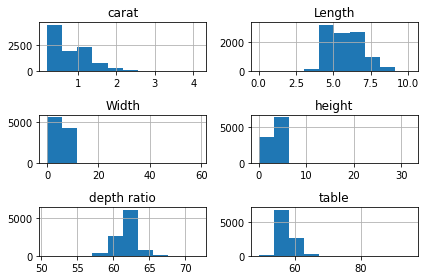

In [7]:
df.hist()
save_fig("hist")  # extra code

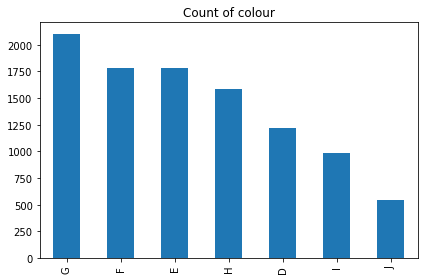

In [8]:
df["colour"].value_counts().plot(kind='bar')
plt.title('Count of colour')
save_fig("Count of colour")  # extra code

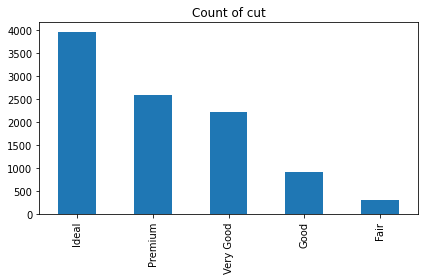

In [9]:
df["cut"].value_counts().plot(kind='bar')
plt.title('Count of cut')
save_fig("Count of cut")  # extra code

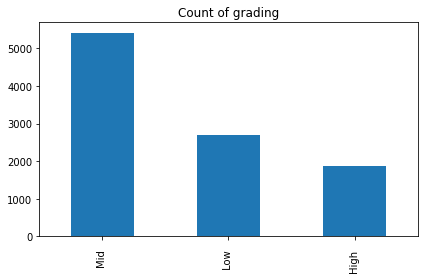

In [10]:
df["Grading"].value_counts().plot(kind='bar')
plt.title('Count of grading')
save_fig("Count of grading")  # extra code

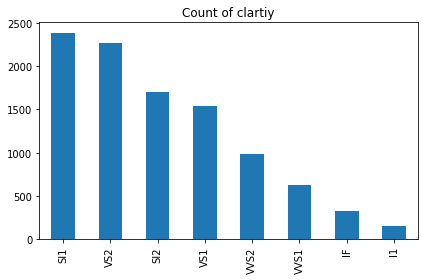

In [11]:
df["clarity"].value_counts().plot(kind='bar')
plt.title('Count of clartiy')
save_fig("Count of clartiy")  # extra code

### Create Test set

In [12]:
# Random sampling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


## Discover and Visualize the Data

In [13]:
# get a train set copy
train_set_copy = train_set.copy()


### Look for correlations

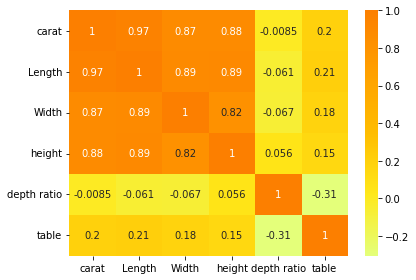

In [14]:

corr_matrix = train_set_copy.corr()
sns.heatmap(corr_matrix, cmap='Wistia', annot=True)
save_fig("corr_matrix")  # extra code

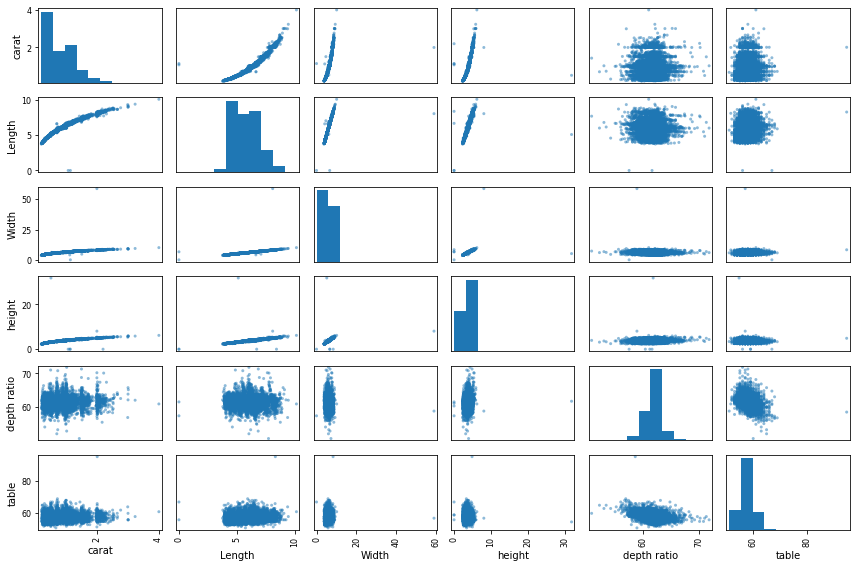

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["carat", "Length", "Width",
              "height", "depth ratio", "table"]
scatter_matrix(train_set_copy[attributes], figsize=(12, 8))
save_fig("attributes")  # extra code
plt.show()


## Prepare the data for ML algotithms


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

y_train = train_set['Grading']
X_train = train_set.drop("Grading", axis=1)
y_test = test_set["Grading"]
X_test = test_set.drop("Grading", axis=1)


## Select different classifiers


In [17]:
# use SVM as classifier
from sklearn.svm import SVC
svm_clf = make_pipeline(preprocessing, SVC(random_state=42))
svm_clf.fit(X_train, y_train)
svm_predict = svm_clf.predict(test_set)


In [41]:
# use KNN as classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = make_pipeline(preprocessing, KNeighborsClassifier())
knn_clf.fit(X_train, y_train)
knn_predict = knn_clf.predict(test_set)



In [18]:
# use decision tree as classifirer
from sklearn.tree import DecisionTreeClassifier
dt_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
dt_clf.fit(X_train, y_train)
dt_predict = dt_clf.predict(test_set)


In [43]:
# use random forest as classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
rf_clf.fit(X_train, y_train)
rf_predict = rf_clf.predict(test_set)

In [47]:
# use logistic regression as classifier
from sklearn.linear_model import LogisticRegression
lr_clf = make_pipeline(preprocessing, LogisticRegression(random_state=42))
lr_clf.fit(X_train, y_train)
lr_predict = lr_clf.predict(test_set)


/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# use naive bayes as classifier
from sklearn.naive_bayes import GaussianNB
nb_clf = make_pipeline(preprocessing, GaussianNB())
nb_clf.fit(X_train, y_train)
nb_predict = nb_clf.predict(test_set)


## Performance Measures

### Measuring Accuracy, precision, recall and f1

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# performance of svm
accuracy_svm = accuracy_score(y_test, svm_predict)
precision_svm = precision_score(y_test, svm_predict, average='weighted')
recall_svm = recall_score(y_test, svm_predict, average='weighted')
f1_svm = f1_score(y_test, svm_predict, average='weighted')
confusion_mat_svm = confusion_matrix(y_test, svm_predict)

print(f'Accuracy: {accuracy_svm}')
print(f'Precision: {precision_svm}')
print(f'Recall: {recall_svm}')
print(f'F1 score: {f1_svm}')
print(f'Confusion matrix: \n{confusion_mat_svm}')


Accuracy: 0.944
Precision: 0.944315441179156
Recall: 0.944
F1 score: 0.9440315431083787
Confusion matrix: 
[[ 529    0   22]
 [   0  339   23]
 [  40   27 1020]]


In [20]:
# performance of decision tree
accuracy_dt = accuracy_score(y_test, dt_predict)
precision_dt = precision_score(y_test, dt_predict, average='weighted')
recall_dt = recall_score(y_test, dt_predict, average='weighted')
f1_dt = f1_score(y_test, dt_predict, average='weighted')
confusion_mat_dt = confusion_matrix(y_test, dt_predict)
print(f'Accuracy: {accuracy_dt}')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')
print(f'F1 score: {f1_dt}')
print(f'Confusion matrix: \n{confusion_mat_dt}')


Accuracy: 0.9195
Precision: 0.9199043562834313
Recall: 0.9195
F1 score: 0.9195682344082616
Confusion matrix: 
[[ 501    0   50]
 [   0  337   25]
 [  42   44 1001]]


In [42]:
# performance of KNN
accuracy_knn = accuracy_score(y_test, knn_predict)
precision_knn = precision_score(y_test, knn_predict, average='weighted')
recall_knn = recall_score(y_test, knn_predict, average='weighted')
f1_knn = f1_score(y_test, knn_predict, average='weighted')
confusion_mat_knn = confusion_matrix(y_test, knn_predict)
print(f'Accuracy: {accuracy_knn}')
print(f'Precision: {precision_knn}')
print(f'Recall: {recall_knn}')
print(f'F1 score: {f1_knn}')
print(f'Confusion matrix: \n{confusion_mat_knn}')


Accuracy: 0.8975
Precision: 0.8978968778385236
Recall: 0.8975
F1 score: 0.8973955212451931
Confusion matrix: 
[[505   0  46]
 [  0 307  55]
 [ 72  32 983]]


In [44]:
# performance of random forest
accuracy_rf = accuracy_score(y_test, rf_predict)
precision_rf = precision_score(y_test, rf_predict, average='weighted')
recall_rf = recall_score(y_test, rf_predict, average='weighted')
f1_rf = f1_score(y_test, rf_predict, average='weighted')
confusion_mat_rf = confusion_matrix(y_test, rf_predict)
print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1 score: {f1_rf}')
print(f'Confusion matrix: \n{confusion_mat_rf}')


Accuracy: 0.942
Precision: 0.9421692725474808
Recall: 0.942
F1 score: 0.9420352423397534
Confusion matrix: 
[[ 520    0   31]
 [   0  342   20]
 [  37   28 1022]]


In [48]:
# performance of logistic regression
accuracy_lr = accuracy_score(y_test, lr_predict)
precision_lr = precision_score(y_test, lr_predict, average='weighted')
recall_lr = recall_score(y_test, lr_predict, average='weighted')
f1_lr = f1_score(y_test, lr_predict, average='weighted')
confusion_mat_lr = confusion_matrix(y_test, lr_predict)
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')
print(f'F1 score: {f1_lr}')
print(f'Confusion matrix: \n{confusion_mat_lr}')


Accuracy: 0.944
Precision: 0.9439993939393939
Recall: 0.944
F1 score: 0.943999160011275
Confusion matrix: 
[[ 516    0   35]
 [   0  341   21]
 [  34   22 1031]]


In [51]:
# performance of naive bayes
accuracy_nb = accuracy_score(y_test, nb_predict)
precision_nb = precision_score(y_test, nb_predict, average='weighted')
recall_nb = recall_score(y_test, nb_predict, average='weighted')
f1_nb = f1_score(y_test, nb_predict, average='weighted')
confusion_mat_nb = confusion_matrix(y_test, nb_predict)
print(f'Accuracy: {accuracy_nb}')
print(f'Precision: {precision_nb}')
print(f'Recall: {recall_nb}')
print(f'F1 score: {f1_nb}')
print(f'Confusion matrix: \n{confusion_mat_nb}')


Accuracy: 0.8385
Precision: 0.846777451851237
Recall: 0.8385
F1 score: 0.8386923810165993
Confusion matrix: 
[[534   0  17]
 [  0 286  76]
 [100 130 857]]


### Visualise the confusion matrix

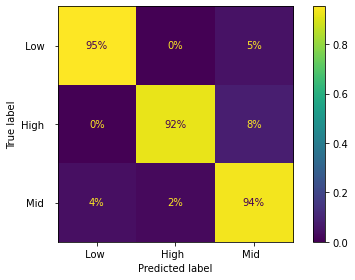

In [21]:
# svm Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred_svm = cross_val_predict(svm_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(
    y_train, y_train_pred_svm, normalize="true", values_format=".0%")

save_fig("ConfusionMatrixDisplay_svm")  # extra code
plt.show()

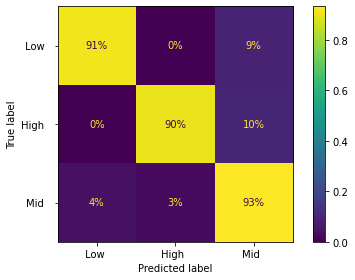

In [22]:
y_train_pred_dt = cross_val_predict(dt_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_dt,
                                        normalize="true", values_format=".0%")
save_fig("ConfusionMatrixDisplay_dt")  # extra code
plt.show()


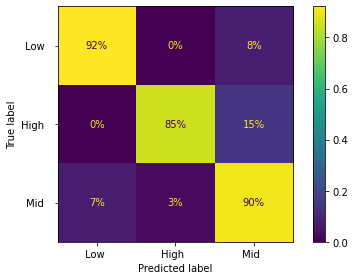

In [45]:
# KNN Confusion matrix
y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_knn,
                                        normalize="true", values_format=".0%")
save_fig("ConfusionMatrixDisplay_knn")  # extra code
plt.show()


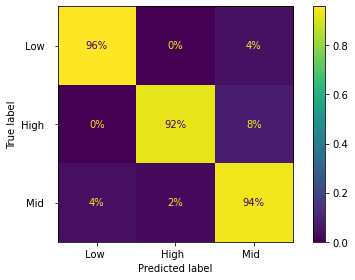

In [46]:
# Random Forest Confusion matrix
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_rf,
                                        normalize="true", values_format=".0%")  
save_fig("ConfusionMatrixDisplay_rf")  # extra code
plt.show()


/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

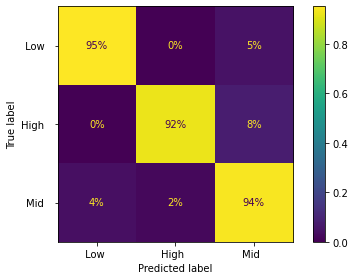

In [49]:
# Logistic Regression Confusion matrix
y_train_pred_lr = cross_val_predict(lr_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_lr,
                                        normalize="true", values_format=".0%")
save_fig("ConfusionMatrixDisplay_lr")  # extra code
plt.show()



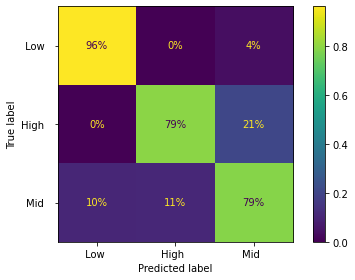

In [52]:
# Naive Bayes Confusion matrix
y_train_pred_nb = cross_val_predict(nb_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_nb,
                                        normalize="true", values_format=".0%")  
save_fig("ConfusionMatrixDisplay_nb")  # extra code
plt.show()


In [23]:
# use grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = [  # try 12 (3×4) combinations of hyperparameters          
    {'svc__C': [0.1, 1, 10, 100], 'svc__kernel': ['linear']},
    {'svc__C': [0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.0001],
        'svc__kernel': ['rbf']},
]

grid_search = GridSearchCV(svm_clf, param_grid, cv=5,
                            scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

# use random search to find the best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distribs = {  # try 12 (3×4) combinations of hyperparameters
    'svc__C': uniform(0.1, 100),
    'svc__gamma': reciprocal(0.001, 0.1),
    'svc__kernel': ['rbf', 'linear'],
}
rnd_search = RandomizedSearchCV(svm_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train, y_train)
rnd_search.best_params_


{'svc__C': 93.955270901575,
 'svc__gamma': 0.001003592787878091,
 'svc__kernel': 'linear'}